# Imports

`numpy`      package for array handling  
`pandas`     import to create and modify dataframes     
`matplotlib` package for data visulization  

In [10]:
# Imports 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# Loading the data
Here we are taking the inbuilt function of keras to load the data from the server  
The dataset file in present in the [Link to dataset in amazon server](https://s3.amazonaws.com/keras-datasets/boston_housing.npz)  
The inbuilt code 
```python
def load_data(path='boston_housing.npz', test_split=0.2, seed=113):
    """Loads the Boston Housing dataset.
    # Arguments
        path: path where to cache the dataset locally
            (relative to ~/.keras/datasets).
        test_split: fraction of the data to reserve as test set.
        seed: Random seed for shuffling the data
            before computing the test split.
    # Returns
        Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.
    """
    assert 0 <= test_split < 1
    path = get_file(
        path,
        origin='https://s3.amazonaws.com/keras-datasets/boston_housing.npz',
        file_hash='f553886a1f8d56431e820c5b82552d9d95cfcb96d1e678153f8839538947dff5')
    with np.load(path) as f:
        x = f['x']
        y = f['y']

    np.random.seed(seed)
    indices = np.arange(len(x))
    np.random.shuffle(indices)
    x = x[indices]
    y = y[indices]

    x_train = np.array(x[:int(len(x) * (1 - test_split))])
    y_train = np.array(y[:int(len(x) * (1 - test_split))])
    x_test = np.array(x[int(len(x) * (1 - test_split)):])
    y_test = np.array(y[int(len(x) * (1 - test_split)):])
    return (x_train, y_train), (x_test, y_test)
```
## Regarding Dataset

This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. This dataset contains attributes regarding the housing in boston. There are 506 samples in the dataset.   
[official Link](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)   
`Line 4` : created a dictionary with respective labels

In [11]:
# Loading the dataset
from keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

# Understand the dataset
Let see the size and shape of test and training tuples

``On Execution``  
There will be 404 samples of 13 attributes in training set  
There will be 102 samples of 13 attributes in testing set

In [12]:
404# Understanding the data
print("The number of training samples",len(x_train))
print("The number of testing samples",len(x_test))
print("The shape of training samples array",np.shape(x_train))
print("The shape of training samples labels", np.shape(y_train))

The number of training samples 404
The number of testing samples 102
The shape of training samples array (404, 13)
The shape of training samples labels (404,)


# Visualizing the data
Let us try to visualise the few samples of data so, we could get an idea of how the data looks like  
`On Execution`  
We can see ten images of 

In [13]:
# Visualizing the data

df = pd.DataFrame(x_train, columns=columns[:-1])
df.head()

## Labels 
print("{} values :".format(columns[-1]),y_train[0:10]) 

MEDV values : [15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]


# Preprocessing the data



## Normalization
We are subtracting the mean of the whole column from the each value and dividing it by standard deviation for every attribute in testing and training sets.
>Note: since its a simple dataset there is not much of processing required to attain good accuracies. For all real time datasest preprocessing like normalizing , standadising , on hot encoding, filling the missing values, transforming features, feeding the data in batches and all other type of preprocessing is required


In [14]:
# Preprocessing the data

## Normalization
mean = x_train.mean(axis=0)        #Train Data
std = x_train.std(axis=0)
train_data = (x_train - mean) / std

mean = y_train.mean(axis=0)        #Train Labels Data
std = y_train.std(axis=0)
y_train = (y_train - mean) / std

mean = x_test.mean(axis=0)        #Test Data
std = x_test.std(axis=0)
train_data = (x_test - mean) / std

mean = y_test.mean(axis=0)        #Test Labels Data
std = y_test.std(axis=0)
y_test = (y_test - mean) / std

# Training varibles
These Training varbles are hyper parameters for neural network training.   
`epochs` : each epoch is forward propagation + backward propagation over the whole dataset once is called one epoch.  
`learning_rate` : the magnitude in which the weights are modified one the acquired loss.   
`learning_rate_decay` : there can be high leanring rate at the beining of the training when the loss is high. Over a period of time the learning rate can reduce for fine training of network.  
`batch_size` : the data is fed to the network in batches of 32 samples at each time. This batch feeding is done all over the whole dataset.  

In [15]:
# Training varibles
learning_rate = 0.0001
learning_rate_decay = 0.000001
batch_size = 32
epochs = 20

# Neural Netowork Model
`Line 6` : we are building a keras sequential model  
`Line 12` : we are using stochastic gradient decent optimizer  
`Line 16` : compiling the model to check if the model is build properly.  

The loss function being used is `categorical_crossentropy` since its a multi class classification


In [16]:
# Building the model
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

model = Sequential()
model.add(Dense(64, activation = 'relu',input_shape=(x_train.shape[1],)))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1))

# Optimizer
optimizer = RMSprop(lr=learning_rate, rho=0.9, epsilon=None, decay=learning_rate_decay)

# Compiling the model
model.compile(loss='mse',optimizer=optimizer,metrics=['mae'])

# Training 
Training is the process of feeding the data to neural network and modifiying the weights of the model using the the backpropagation algorithm. The backpropagation using loss the function acquires the loss over batch size of data and does a backpropagation to modify the weights in such a way the in the next epoch the loss would be less when compared to the current epoch

In [17]:
# Training
model_history = model.fit(x_train, y_train, epochs=epochs,validation_split=0.2, verbose=1)

Train on 323 samples, validate on 81 samples
Epoch 1/20
323/323 [==============================] - 1s 2ms/step - loss: 495.8419 - mean_absolute_error: 14.9839 - val_loss: 184.8487 - val_mean_absolute_error: 8.1478
Epoch 2/20
323/323 [==============================] - 0s 272us/step - loss: 246.5144 - mean_absolute_error: 9.3232 - val_loss: 90.0330 - val_mean_absolute_error: 5.2201
Epoch 3/20
323/323 [==============================] - 0s 289us/step - loss: 137.0322 - mean_absolute_error: 6.5186 - val_loss: 48.3288 - val_mean_absolute_error: 4.0451
Epoch 4/20
323/323 [==============================] - 0s 303us/step - loss: 76.8810 - mean_absolute_error: 5.1096 - val_loss: 39.7203 - val_mean_absolute_error: 4.9511
Epoch 5/20
323/323 [==============================] - 0s 286us/step - loss: 44.9263 - mean_absolute_error: 4.5801 - val_loss: 30.1860 - val_mean_absolute_error: 4.2216
Epoch 6/20
323/323 [==============================] - 0s 296us/step - loss: 33.7570 - mean_absolute_error: 4.085

# Results
using the trained model we try to predict what are the values of target label in the test set

In [18]:
# Results
y_pred = model.predict(x=x_test, batch_size=batch_size, verbose=1)

102/102 [==============================] - 0s 607us/step


# Verifying the results
cheking the results how good they are with the first 10 samples.   
Plotting the graphs of test and train set accuracies and loss values. 
> NOTE: This plot is a very curicial step. These plots would tell us how good the model converges and if there is any overfitting

Ground truths of first 10 images in test set [-1.74032966 -0.46893052 -0.44700984  0.42981715 -0.09627904  0.15580872
  0.89015133 -0.01955668 -0.28260478  0.01332433]
Predicted values of first 10 image in test set [0 0 0 0 0 0 0 0 0 0]


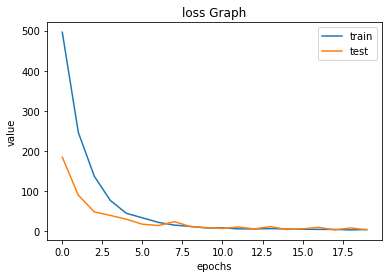

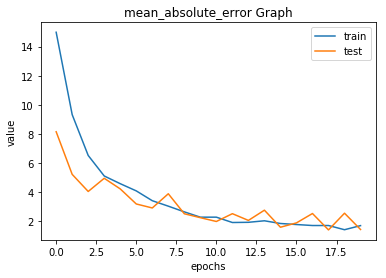

In [19]:
# Verifying the results
print("Ground truths of first 10 images in test set",np.array(y_test[0:10]))
print("Predicted values of first 10 image in test set",np.argmax(y_pred[0:10],axis=1))

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
plt.plot(loss,label='train')
plt.plot(val_loss,label='test')
plt.title('loss Graph')
plt.ylabel('value')
plt.xlabel('epochs')
plt.legend()
plt.show()

acc = model_history.history['mean_absolute_error']
val_acc = model_history.history['val_mean_absolute_error']
plt.plot(acc,label='train')
plt.plot(val_acc,label='test')
plt.title('mean_absolute_error Graph')
plt.ylabel('value')
plt.xlabel('epochs')
plt.legend()
plt.show()